<a href="https://colab.research.google.com/github/Divyam-Deep/KMean-Kaggle-usingPCA/blob/main/Kmean_Kaggle_Using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set()

In [115]:
data = pd.read_csv('/content/data.csv')
data

,ID,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg
0,0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631
1,1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558
2,2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667
3,3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190
4,4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,297.375000,96.781787,36.783138,33,63.553496,71.280000,25.607664,-0.032664,18.349942,0.093697,0.087447,0.070246,7,0.100267,0.009748,0.129167
896,896,286.882353,67.382815,21.654941,35,24.585702,75.000000,15.535835,-0.067423,14.895967,0.068750,0.059989,0.047756,4,0.074466,0.027122,0.102938
897,897,108.163044,30.521773,6.680616,93,9.026865,71.139442,12.971889,-0.048678,5.739907,0.072980,0.092511,0.058975,7,0.069264,0.136371,0.061452
898,898,146.328358,39.435649,25.710653,68,7.213975,102.000000,13.453077,-0.086668,0.149677,0.013432,0.060741,0.060494,1,0.098173,0.026701,0.156494


In [116]:
data.columns

Index(['ID', 'RRmean', 'PTdis', 'STdis', 'RRTot', 'SDRR', 'hbpermin', 'PQdis',
       'PQslope', 'QRdis', 'QRSseg', 'PQseg', 'Pseg', 'NN50', 'STseg',
       'STslope', 'Tseg'],
      dtype='object')

In [117]:
data.isnull().sum()

,0
ID,0
RRmean,0
PTdis,0
STdis,0
RRTot,0
SDRR,0
hbpermin,0
PQdis,0
PQslope,0
QRdis,0


In [118]:
#id is of no use then
cleaned_data = data.drop('ID',axis=1)
cleaned_data.head()

,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg
0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631
1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558
2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667
3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190
4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399


In [119]:
#scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)
scaled_data

array([[ 1.57548588,  1.44027469,  1.28760056, ...,  0.65589895,
        -0.93820272,  0.34986274],
       [-0.99937877, -1.18421266, -0.87821784, ...,  0.62870398,
         0.64803605, -0.44758595],
       [ 1.17216083,  1.23721928, -0.12184091, ..., -1.61145481,
        -0.33984953, -0.23398806],
       ...,
       [-0.77361631, -0.83994765, -1.5623762 , ..., -1.58500949,
         3.1598987 , -1.62270365],
       [-0.41503117, -0.52471539,  0.26402683, ...,  0.45041373,
        -0.60805667,  2.35102339],
       [ 1.00854331,  1.8978119 ,  0.72272728, ..., -0.16565277,
        -0.2458214 ,  0.00910123]])

In [120]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(scaled_data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

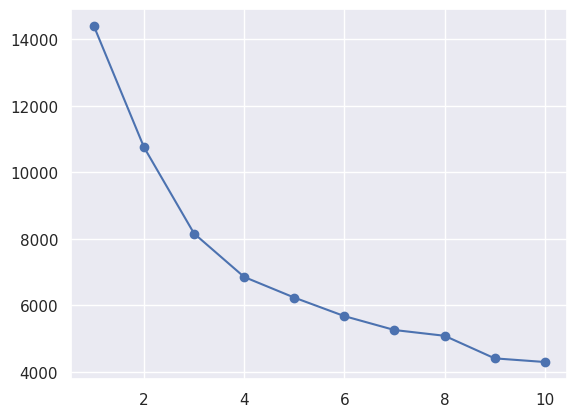

In [121]:
plt.plot(range(1,11),wcss , marker='o')
plt.show()  #as its not clear much i will check with other methods also

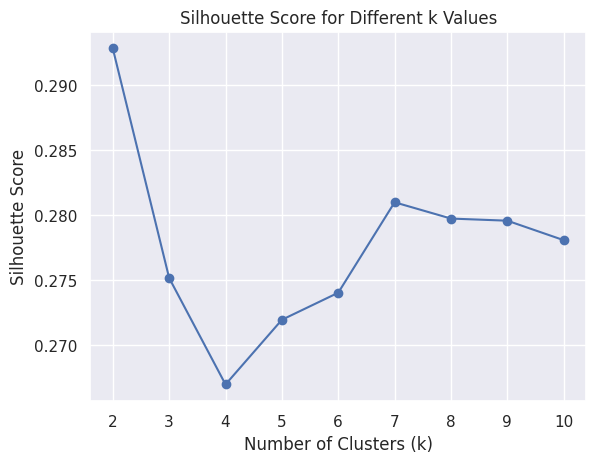

In [122]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # start from 2 because silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# in this method we choose the max value

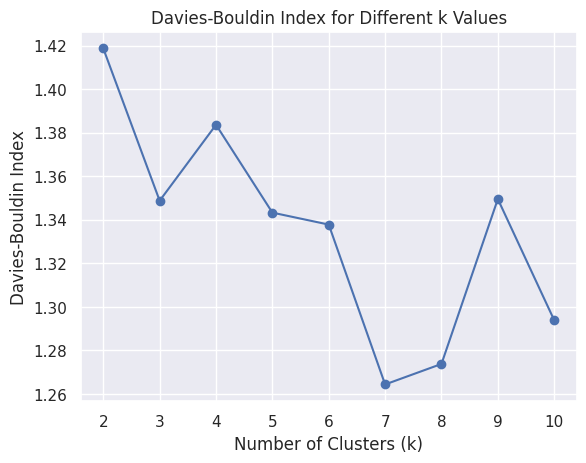

In [123]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for i in range(2, 11):  # start from 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
    davies_bouldin_scores.append(db_score)

# Plotting the Davies-Bouldin scores
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# in this we choose the min value

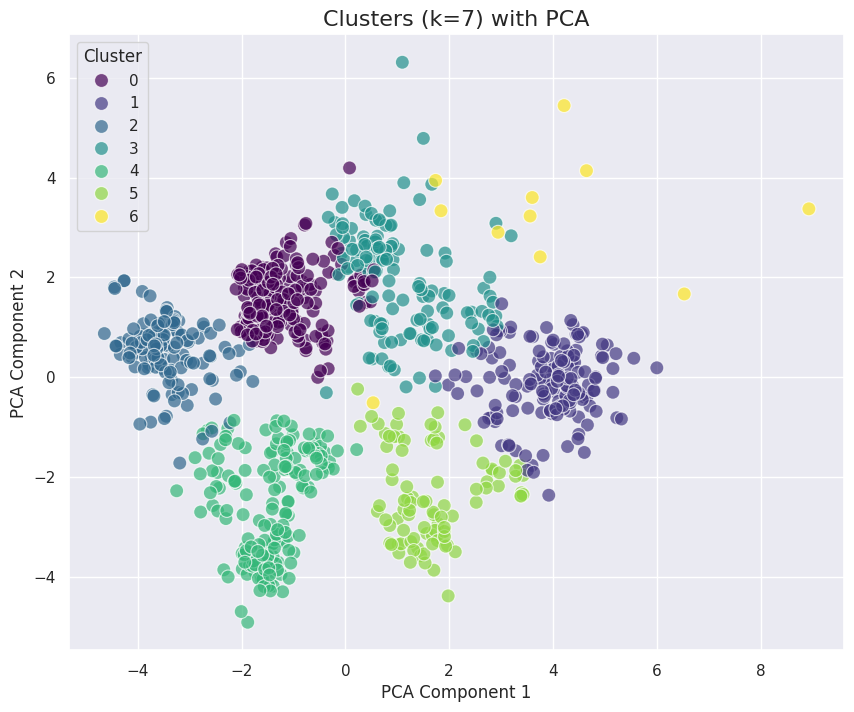

In [126]:
from sklearn.decomposition import PCA
# Apply KMeans with k=7
kmeans_new = KMeans(7, random_state=42)
kmeans_new.fit(scaled_data)

# Add the cluster labels to the original cleaned data
cleaned_data['Cluster'] = kmeans_new.labels_

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA data along with cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = cleaned_data['Cluster']

# Plotting the clusters after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.7)

# Title and labels
plt.title("Clusters (k=7) with PCA", fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title="Cluster")
plt.show()

In [127]:
kmeans_new = KMeans(7)
kmeans_new.fit(scaled_data)
clusters_new = data.copy()
clusters_new['Clusters'] = kmeans_new.fit_predict(scaled_data)
clusters_new.head()

,ID,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg,Clusters
0,0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631,3
1,1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558,1
2,2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667,0
3,3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190,4
4,4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399,0
